In [3]:
import torch
import torch_geometric
from torch_geometric.datasets import TUDataset

import matplotlib.pyplot as plt
import networkx as nx

In [4]:
dataset = TUDataset(root='datasets/', name='IMDB-BINARY')

Extracting datasets\IMDB-BINARY\IMDB-BINARY.zip
Processing...
Done!


In [5]:
sample = dataset[0]

In [6]:
sample

Data(edge_index=[2, 146], y=[1], num_nodes=20)

In [7]:
# edge transform
def edgeToTuple(edge):
    st = []
    for _, (s, d) in enumerate(zip(edge[0], edge[1])):
        st.append((s.item(), d.item()))
        # print(s.item(),',',d.item())
    return st

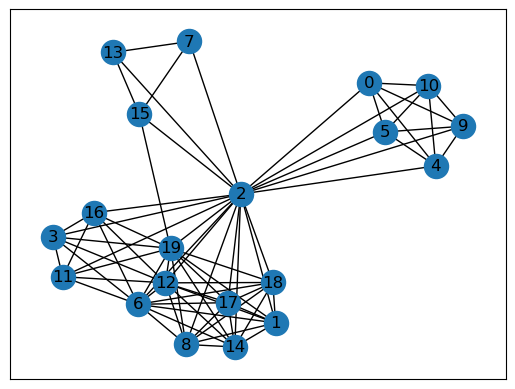

In [8]:
G = nx.Graph(edgeToTuple(sample.edge_index))
nx.draw_networkx(G)

Data(edge_index=[2, 146], y=[1], num_nodes=20)
Class  0


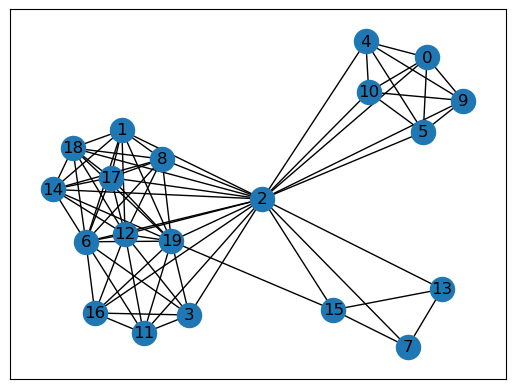

Data(edge_index=[2, 256], y=[1], num_nodes=32)
Class  0


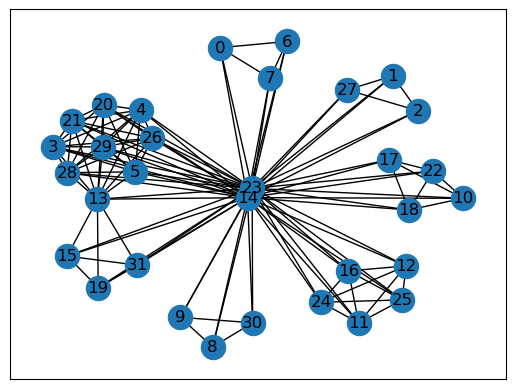

Data(edge_index=[2, 162], y=[1], num_nodes=21)
Class  0


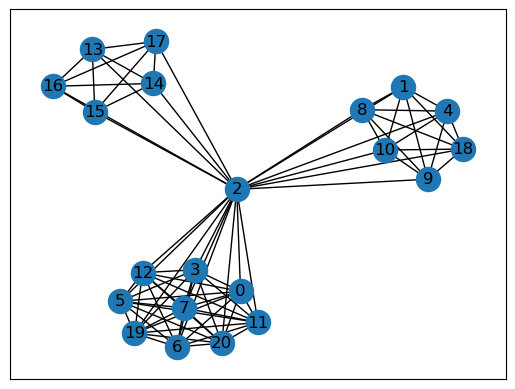

Data(edge_index=[2, 266], y=[1], num_nodes=35)
Class  0


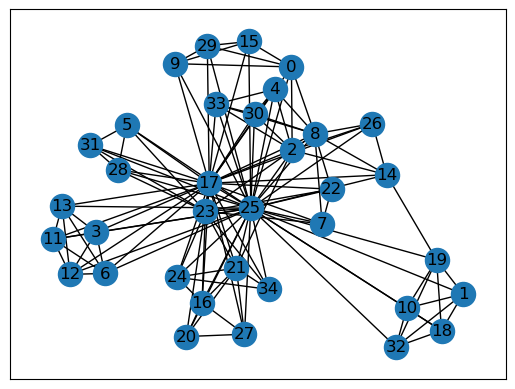

Data(edge_index=[2, 112], y=[1], num_nodes=14)
Class  0


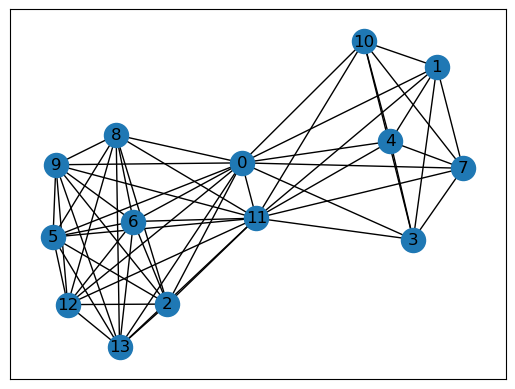

Data(edge_index=[2, 422], y=[1], num_nodes=63)
Class  0


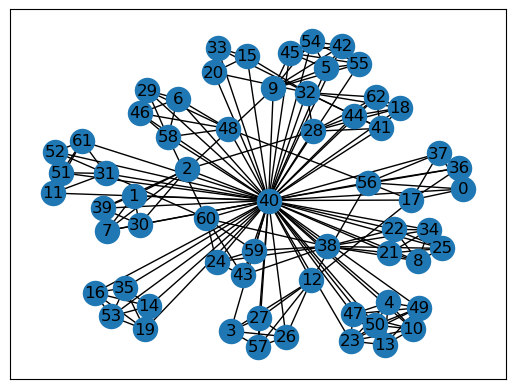

Data(edge_index=[2, 132], y=[1], num_nodes=12)
Class  0


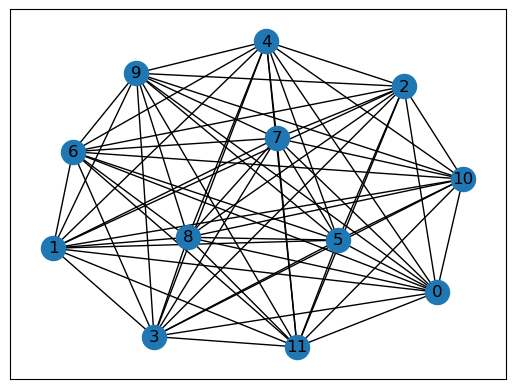

Data(edge_index=[2, 126], y=[1], num_nodes=15)
Class  0


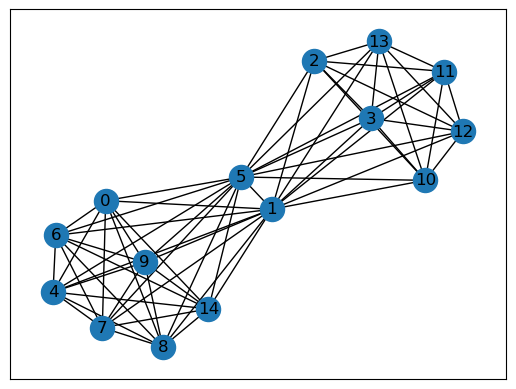

Data(edge_index=[2, 306], y=[1], num_nodes=18)
Class  0


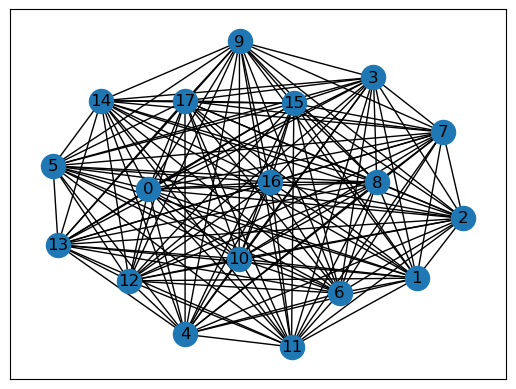

Data(edge_index=[2, 132], y=[1], num_nodes=12)
Class  0


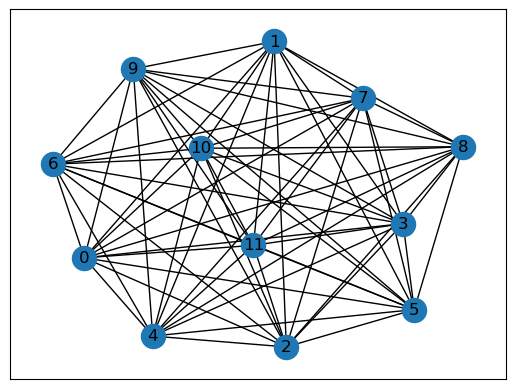

In [9]:
i = 0
y1 = 0
y2 = 0
for graph in dataset:
    print(graph)
    print("Class ", graph.y.item())
    G = nx.Graph(edgeToTuple(graph.edge_index))
    nx.draw_networkx(G)
    plt.show()
    i += 1
    if i>=10:
        break

Data(edge_index=[2, 132], y=[1], num_nodes=12)
Class  1


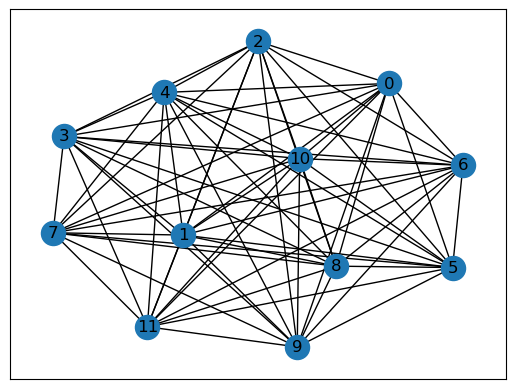

Data(edge_index=[2, 72], y=[1], num_nodes=14)
Class  1


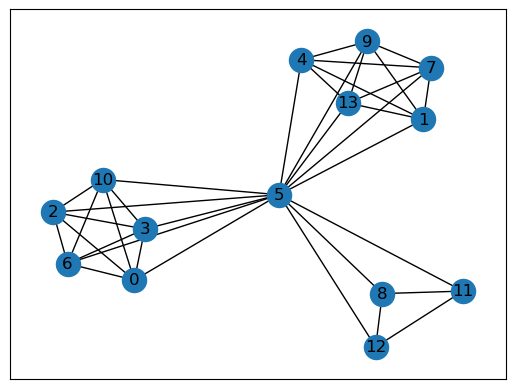

Data(edge_index=[2, 62], y=[1], num_nodes=13)
Class  1


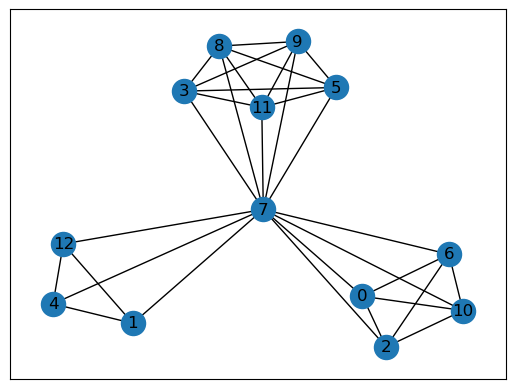

Data(edge_index=[2, 84], y=[1], num_nodes=15)
Class  1


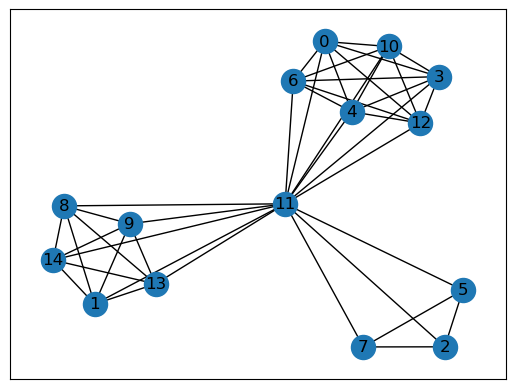

Data(edge_index=[2, 108], y=[1], num_nodes=13)
Class  1


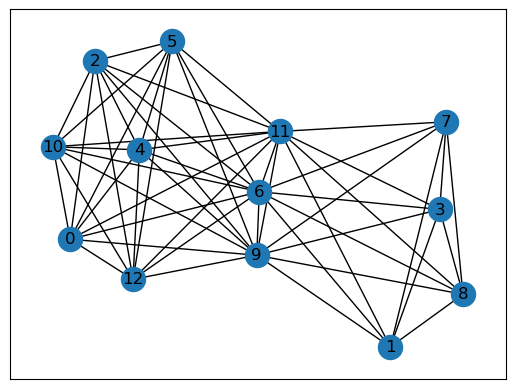

Data(edge_index=[2, 114], y=[1], num_nodes=22)
Class  1


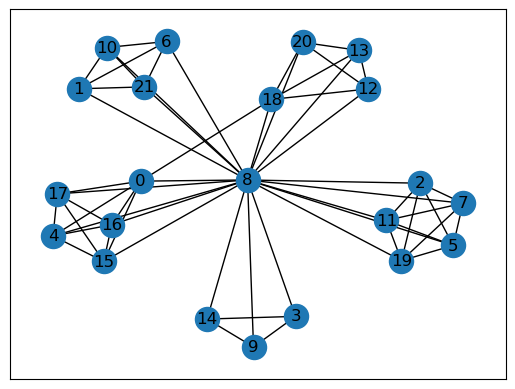

Data(edge_index=[2, 62], y=[1], num_nodes=13)
Class  1


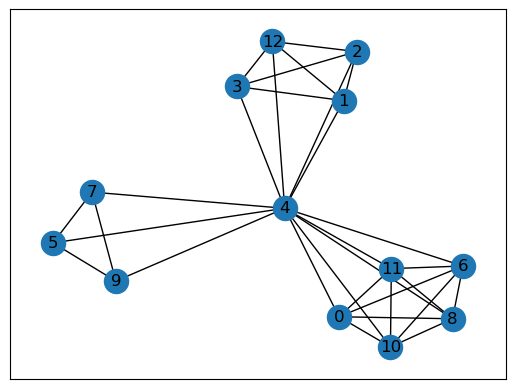

Data(edge_index=[2, 168], y=[1], num_nodes=27)
Class  1


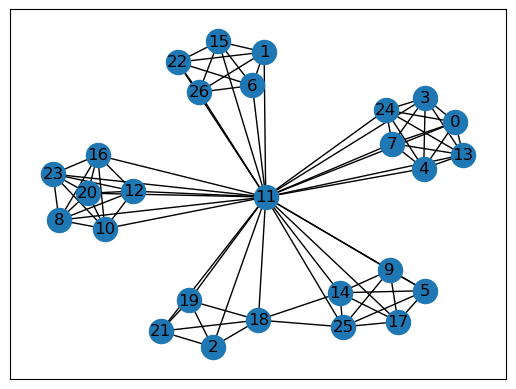

Data(edge_index=[2, 82], y=[1], num_nodes=15)
Class  1


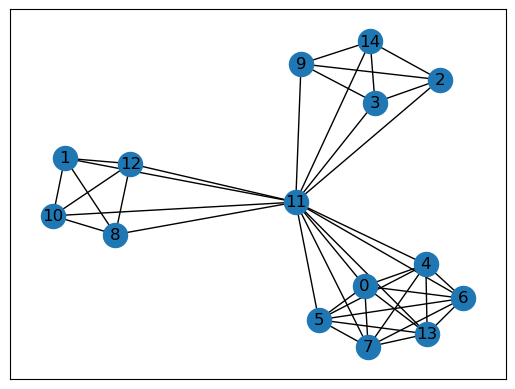

Data(edge_index=[2, 72], y=[1], num_nodes=12)
Class  1


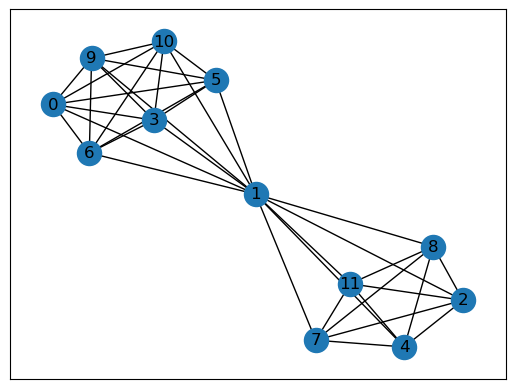

In [74]:
i = 0
for graph in dataset:
    if (graph.y.item() == 0):
        continue
    print(graph)
    print("Class ", graph.y.item())
    G = nx.Graph(edgeToTuple(graph.edge_index))
    nx.draw_networkx(G)
    plt.show()
    i += 1
    if i>=10:
        break

## Girvan Newmann

Graph 1

In [78]:
G1 = G
comp = nx.community.girvan_newman(G)

In [79]:
import itertools
k = 4
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
communities = []
for com in limited:
    communities.append(com)
    print(tuple(sorted(c) for c in com))

([0, 1, 3, 5, 6, 9, 10], [2, 4, 7, 8, 11])
([0], [1, 3, 5, 6, 9, 10], [2, 4, 7, 8, 11])
([0], [1], [3, 5, 6, 9, 10], [2, 4, 7, 8, 11])


{0}
[]

{1, 3, 5, 6, 9, 10}
[(1, 3), (1, 5), (1, 6), (1, 9), (1, 10), (3, 5), (3, 6), (3, 9), (3, 10), (5, 6), (5, 9), (5, 10), (6, 9), (6, 10), (9, 10)]

{2, 4, 7, 8, 11}
[(2, 4), (2, 7), (2, 8), (2, 11), (4, 7), (4, 8), (4, 11), (7, 8), (7, 11), (8, 11)]



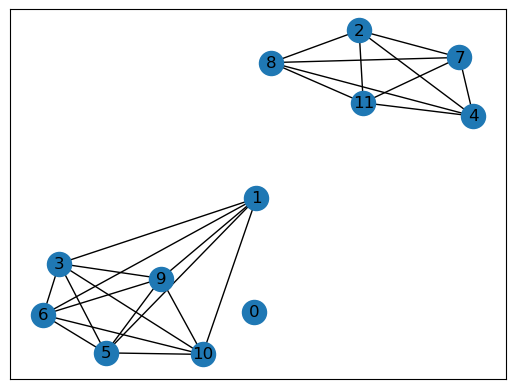

In [80]:
sub = []
for c in communities[1]:
    w = G.subgraph(c)
    print(c)
    print(w.edges)
    print()
    
    nx.draw_networkx(w, nx.spring_layout(G, seed=6))
    # plt.show()

Graph 2

Data(edge_index=[2, 132], y=[1], num_nodes=12)
Class  1
Data(edge_index=[2, 72], y=[1], num_nodes=14)
Class  1


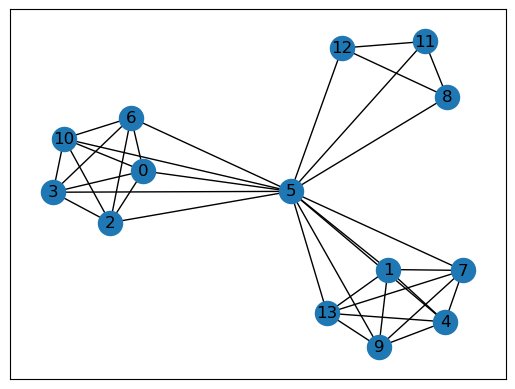

In [91]:
i = 0
for graph in dataset:
    if (graph.y.item() == 0):
        continue
    i += 1
    if i>=2:
        print(graph)
        print("Class ", graph.y.item())
        G = nx.Graph(edgeToTuple(graph.edge_index))
        nx.draw_networkx(G)
        plt.show()
        break

In [92]:
G2 = G
comp = nx.community.girvan_newman(G)
k = 4
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
communities = []
for com in limited:
    communities.append(com)
    print(tuple(sorted(c) for c in com))

([0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 13], [8, 11, 12])
([0, 2, 3, 6, 10], [1, 4, 5, 7, 9, 13], [8, 11, 12])
([0], [2, 3, 6, 10], [1, 4, 5, 7, 9, 13], [8, 11, 12])


{0}
[]

{3, 2, 10, 6}
[(10, 2), (10, 3), (10, 6), (2, 3), (2, 6), (3, 6)]

{1, 4, 5, 7, 9, 13}
[(1, 4), (1, 5), (1, 7), (1, 9), (1, 13), (4, 5), (4, 7), (4, 9), (4, 13), (5, 7), (5, 9), (5, 13), (7, 9), (7, 13), (9, 13)]

{8, 11, 12}
[(8, 11), (8, 12), (11, 12)]



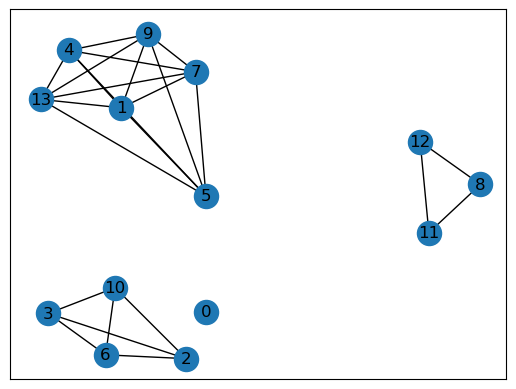

In [93]:
sub = []
for c in communities[2]:
    w = G.subgraph(c)
    print(c)
    print(w.edges)
    print()
    
    nx.draw_networkx(w, nx.spring_layout(G, seed=6))
    # plt.show()

## Louvain Community

Graph 1

{0, 3, 5, 6, 9, 10}
[(0, 3), (0, 5), (0, 6), (0, 9), (0, 10), (3, 5), (3, 6), (3, 9), (3, 10), (5, 6), (5, 9), (5, 10), (6, 9), (6, 10), (9, 10)]

{1, 2, 4, 7, 8, 11}
[(1, 2), (1, 4), (1, 7), (1, 8), (1, 11), (2, 4), (2, 7), (2, 8), (2, 11), (4, 7), (4, 8), (4, 11), (7, 8), (7, 11), (8, 11)]



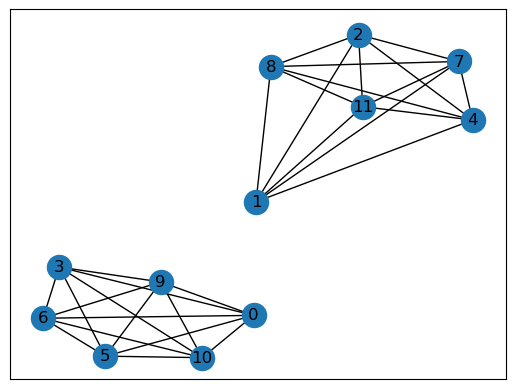

In [111]:
communities = nx.community.louvain_communities(G1, seed=42)
sub = []
for c in communities:
    w = G1.subgraph(c)
    print(c)
    print(w.edges)
    print()
    nx.draw_networkx(w, nx.spring_layout(G1, seed=6))

In [114]:
nx.community.louvain_communities(G2, seed=42)
sub = []
for c in communities:
    w = G2.subgraph(c)
    print(c)
    print(w.edges)
    print()
    nx.draw_networkx(w, nx.spring_layout(G2, seed=6))

[{0, 2, 3, 6, 10}, {1, 4, 7, 9, 13}, {5, 8, 11, 12}]